# Day 6 of Data Science Training by `Mr. Harshit Dawar`!

## Types of Machine Learning
* Supervised Learning:  Has always a class/label associated with it.
  * Regression: It predicts a value on the continuous data.
  * Classification: It classifies the data into various categories.
  
* Unsupervised Learning: No output class associated with data.
  * Clustering: 
  
* Reinforcement Learning: Agent interacts with the environment.

* Transfer Learning: Use the base features of one model to train another one.

## Loss/Cost Function
* It is a function which is used to minimize the error in model actual value vs predicted value.

## Gradient Descent  [Very Important Topic]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def gradient_descent(x, y, learning_rate):
    # Equation of line = slope * x + intercept
    slope = 0
    intercept = 0
    
    for i in range(900):
        # It will converge in both cases, as if slope is -ve then according to the loss function it will 
        # be added to provide desired result and if the slope is +ve then according to the loss function it 
        # will be subtracted to converge at the minimum point on the curve.
        
        loss_value = y - (slope * x + intercept)
        
        # Updating slope and intercept
        slope = slope + learning_rate * np.sum(loss_value * x)
        intercept = intercept + learning_rate * np.sum(loss_value)
        
    return slope, intercept
    

In [48]:
m, c = gradient_descent(np.arange(1,10,1), np.arange(5,14,1), learning_rate = 0.001)

In [49]:
m, c

(1.1126386377466844, 3.2912485433198966)

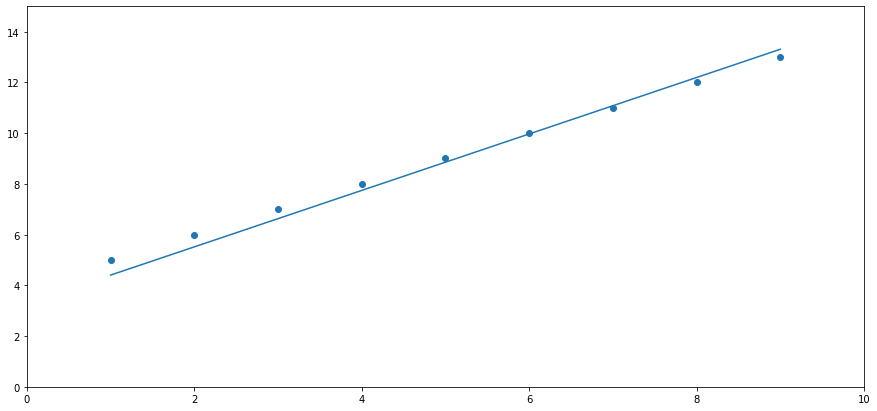

In [51]:
plt.figure(figsize = (15, 7))
plt.scatter(np.arange(1,10,1), np.arange(5,14,1))
plt.plot(np.arange(1,10,1), m * np.arange(1,10,1) + c)
plt.ylim(0, 15)
plt.xlim(0,10)
plt.show()

## Stochastic Gradient Descent
* Takes average for a smaller subpart of the data and applies nomal gradient descent.

## Linear Regression

### Works on gradient distance and uses `Euclidean Distance as a parameter to construct a line`

In [55]:
# Importing machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [53]:
data = pd.read_csv("train.csv")

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data PreProcessing for this project
* Remove missing values.
* Categorical features into numerical features.
* Split the data into training and testing data.


In [60]:
# Split dataset for required features
data.drop(["PassengerId", "Name", "Ticket", "Fare"], axis = 1, inplace = True)

In [61]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [64]:
# Spliting data into labels and features
X = data.drop("Survived", axis = 1)
y = data["Survived"]

In [73]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,NaN,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,NaN,S
3,1,female,35.0,1,0,C123,S
4,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,NaN,S
887,1,female,19.0,0,0,B42,S
888,3,female,NaN,1,2,NaN,S
889,1,male,26.0,0,0,C148,C


In [71]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [74]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [75]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Cabin        object
Embarked     object
dtype: object

In [81]:
# Filling missing values

# For categorical
categorical_features = ["Cabin", "Embarked"]

si_categorical = SimpleImputer(strategy = "constant", fill_value = "Missing")

# For Numerical

numerical_features = ["Age"]

si_numerical = SimpleImputer(strategy="mean")

#Transforming them

transformer = ColumnTransformer(transformers=[
                                ("categorical_transformation", si_categorical, categorical_features),
                                ("numerical_transformation", si_numerical, numerical_features)],
                                remainder = "passthrough"
)

X_transformed = transformer.fit_transform(X)

In [86]:
X_transformed = pd.DataFrame(X_transformed, columns = ["Cabin", "Embarked", "Age", "Pclass","Sex", "SibSp", "Parch" ])

In [87]:
X_transformed.isna().sum()

Cabin       0
Embarked    0
Age         0
Pclass      0
Sex         0
SibSp       0
Parch       0
dtype: int64

In [88]:
X_transformed.head()

,Cabin,Embarked,Age,Pclass,Sex,SibSp,Parch
0,Missing,S,22,3,male,1,0
1,C85,C,38,1,female,1,0
2,Missing,S,26,3,female,0,0
3,C123,S,35,1,female,1,0
4,Missing,S,35,3,male,0,0


In [90]:
X_transformed["Cabin"].nunique()

148

In [91]:
for i in range(len(X_transformed["Cabin"])):
    X_transformed["Cabin"][i] = X_transformed["Cabin"][i][: 1]

In [93]:
X_transformed.head()

,Cabin,Embarked,Age,Pclass,Sex,SibSp,Parch
0,M,S,22,3,male,1,0
1,C,C,38,1,female,1,0
2,M,S,26,3,female,0,0
3,C,S,35,1,female,1,0
4,M,S,35,3,male,0,0


In [94]:
X_transformed["Cabin"].nunique()

9

In [99]:
X_transformed["Embarked"].nunique()

4

In [100]:
X_transformed["Sex"].nunique()

2

In [95]:
X_transformed.dtypes

Cabin       object
Embarked    object
Age         object
Pclass      object
Sex         object
SibSp       object
Parch       object
dtype: object

In [96]:
features = ["Cabin", "Embarked", "Sex"]

encoder = OneHotEncoder(handle_unknown = "ignore")

transformer2 = ColumnTransformer(transformers=[
                                    ("onehotencdoing", encoder, features)],
                                 remainder="passthrough"
                                )

X_final = transformer2.fit_transform(X_transformed)

In [97]:
X_final = pd.DataFrame(X_final)

In [98]:
X_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,22,3,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,38,1,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,26,3,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,35,1,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,35,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,27,2,0,0
887,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,19,1,0,0
888,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,29.6991,3,1,2
889,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,26,1,0,0


In [102]:
X_final[15]

0           22
1           38
2           26
3           35
4           35
        ...   
886         27
887         19
888    29.6991
889         26
890         32
Name: 15, Length: 891, dtype: object

## Linear Regression in action!

In [101]:
# Creating object for it
classifier = LinearRegression()

In [103]:
# Fitiing the dataset without reshaping => error
classifier.fit(X_final[15], y)

ValueError: Expected 2D array, got 1D array instead:
array=[22.         38.         26.         35.         35.         29.69911765
 54.          2.         27.         14.          4.         58.
 20.         39.         14.         55.          2.         29.69911765
 31.         29.69911765 35.         34.         15.         28.
  8.         38.         29.69911765 19.         29.69911765 29.69911765
 40.         29.69911765 29.69911765 66.         28.         42.
 29.69911765 21.         18.         14.         40.         27.
 29.69911765  3.         19.         29.69911765 29.69911765 29.69911765
 29.69911765 18.          7.         21.         49.         29.
 65.         29.69911765 21.         28.5         5.         11.
 22.         38.         45.          4.         29.69911765 29.69911765
 29.         19.         17.         26.         32.         16.
 21.         26.         32.         25.         29.69911765 29.69911765
  0.83       30.         22.         29.         29.69911765 28.
 17.         33.         16.         29.69911765 23.         24.
 29.         20.         46.         26.         59.         29.69911765
 71.         23.         34.         34.         28.         29.69911765
 21.         33.         37.         28.         21.         29.69911765
 38.         29.69911765 47.         14.5        22.         20.
 17.         21.         70.5        29.         24.          2.
 21.         29.69911765 32.5        32.5        54.         12.
 29.69911765 24.         29.69911765 45.         33.         20.
 47.         29.         25.         23.         19.         37.
 16.         24.         29.69911765 22.         24.         19.
 18.         19.         27.          9.         36.5        42.
 51.         22.         55.5        40.5        29.69911765 51.
 16.         30.         29.69911765 29.69911765 44.         40.
 26.         17.          1.          9.         29.69911765 45.
 29.69911765 28.         61.          4.          1.         21.
 56.         18.         29.69911765 50.         30.         36.
 29.69911765 29.69911765  9.          1.          4.         29.69911765
 29.69911765 45.         40.         36.         32.         19.
 19.          3.         44.         58.         29.69911765 42.
 29.69911765 24.         28.         29.69911765 34.         45.5
 18.          2.         32.         26.         16.         40.
 24.         35.         22.         30.         29.69911765 31.
 27.         42.         32.         30.         16.         27.
 51.         29.69911765 38.         22.         19.         20.5
 18.         29.69911765 35.         29.         59.          5.
 24.         29.69911765 44.          8.         19.         33.
 29.69911765 29.69911765 29.         22.         30.         44.
 25.         24.         37.         54.         29.69911765 29.
 62.         30.         41.         29.         29.69911765 30.
 35.         50.         29.69911765  3.         52.         40.
 29.69911765 36.         16.         25.         58.         35.
 29.69911765 25.         41.         37.         29.69911765 63.
 45.         29.69911765  7.         35.         65.         28.
 16.         19.         29.69911765 33.         30.         22.
 42.         22.         26.         19.         36.         24.
 24.         29.69911765 23.5         2.         29.69911765 50.
 29.69911765 29.69911765 19.         29.69911765 29.69911765  0.92
 29.69911765 17.         30.         30.         24.         18.
 26.         28.         43.         26.         24.         54.
 31.         40.         22.         27.         30.         22.
 29.69911765 36.         61.         36.         31.         16.
 29.69911765 45.5        38.         16.         29.69911765 29.69911765
 29.         41.         45.         45.          2.         24.
 28.         25.         36.         24.         40.         29.69911765
  3.         42.         23.         29.69911765 15.         25.
 29.69911765 28.         22.         38.         29.69911765 29.69911765
 40.         29.         45.         35.         29.69911765 30.
 60.         29.69911765 29.69911765 24.         25.         18.
 19.         22.          3.         29.69911765 22.         27.
 20.         19.         42.          1.         32.         35.
 29.69911765 18.          1.         36.         29.69911765 17.
 36.         21.         28.         23.         24.         22.
 31.         46.         23.         28.         39.         26.
 21.         28.         20.         34.         51.          3.
 21.         29.69911765 29.69911765 29.69911765 33.         29.69911765
 44.         29.69911765 34.         18.         30.         10.
 29.69911765 21.         29.         28.         18.         29.69911765
 28.         19.         29.69911765 32.         28.         29.69911765
 42.         17.         50.         14.         21.         24.
 64.         31.         45.         20.         25.         28.
 29.69911765  4.         13.         34.          5.         52.
 36.         29.69911765 30.         49.         29.69911765 29.
 65.         29.69911765 50.         29.69911765 48.         34.
 47.         48.         29.69911765 38.         29.69911765 56.
 29.69911765  0.75       29.69911765 38.         33.         23.
 22.         29.69911765 34.         29.         22.          2.
  9.         29.69911765 50.         63.         25.         29.69911765
 35.         58.         30.          9.         29.69911765 21.
 55.         71.         21.         29.69911765 54.         29.69911765
 25.         24.         17.         21.         29.69911765 37.
 16.         18.         33.         29.69911765 28.         26.
 29.         29.69911765 36.         54.         24.         47.
 34.         29.69911765 36.         32.         30.         22.
 29.69911765 44.         29.69911765 40.5        50.         29.69911765
 39.         23.          2.         29.69911765 17.         29.69911765
 30.          7.         45.         30.         29.69911765 22.
 36.          9.         11.         32.         50.         64.
 19.         29.69911765 33.          8.         17.         27.
 29.69911765 22.         22.         62.         48.         29.69911765
 39.         36.         29.69911765 40.         28.         29.69911765
 29.69911765 24.         19.         29.         29.69911765 32.
 62.         53.         36.         29.69911765 16.         19.
 34.         39.         29.69911765 32.         25.         39.
 54.         36.         29.69911765 18.         47.         60.
 22.         29.69911765 35.         52.         47.         29.69911765
 37.         36.         29.69911765 49.         29.69911765 49.
 24.         29.69911765 29.69911765 44.         35.         36.
 30.         27.         22.         40.         39.         29.69911765
 29.69911765 29.69911765 35.         24.         34.         26.
  4.         26.         27.         42.         20.         21.
 21.         61.         57.         21.         26.         29.69911765
 80.         51.         32.         29.69911765  9.         28.
 32.         31.         41.         29.69911765 20.         24.
  2.         29.69911765  0.75       48.         19.         56.
 29.69911765 23.         29.69911765 18.         21.         29.69911765
 18.         24.         29.69911765 32.         23.         58.
 50.         40.         47.         36.         20.         32.
 25.         29.69911765 43.         29.69911765 40.         31.
 70.         31.         29.69911765 18.         24.5        18.
 43.         36.         29.69911765 27.         20.         14.
 60.         25.         14.         19.         18.         15.
 31.          4.         29.69911765 25.         60.         52.
 44.         29.69911765 49.         42.         18.         35.
 18.         25.         26.         39.         45.         42.
 22.         29.69911765 24.         29.69911765 48.         29.
 52.         19.         38.         27.         29.69911765 33.
  6.         17.         34.         50.         27.         20.
 30.         29.69911765 25.         25.         29.         11.
 29.69911765 23.         23.         28.5        48.         35.
 29.69911765 29.69911765 29.69911765 36.         21.         24.
 31.         70.         16.         30.         19.         31.
  4.          6.         33.         23.         48.          0.67
 28.         18.         34.         33.         29.69911765 41.
 20.         36.         16.         51.         29.69911765 30.5
 29.69911765 32.         24.         48.         57.         29.69911765
 54.         18.         29.69911765  5.         29.69911765 43.
 13.         17.         29.         29.69911765 25.         25.
 18.          8.          1.         46.         29.69911765 16.
 29.69911765 29.69911765 25.         39.         49.         31.
 30.         30.         34.         31.         11.          0.42
 27.         31.         39.         18.         39.         33.
 26.         39.         35.          6.         30.5        29.69911765
 23.         31.         43.         10.         52.         27.
 38.         27.          2.         29.69911765 29.69911765  1.
 29.69911765 62.         15.          0.83       29.69911765 23.
 18.         39.         21.         29.69911765 32.         29.69911765
 20.         16.         30.         34.5        17.         42.
 29.69911765 35.         28.         29.69911765  4.         74.
  9.         16.         44.         18.         45.         51.
 24.         29.69911765 41.         21.         48.         29.69911765
 24.         42.         27.         31.         29.69911765  4.
 26.         47.         33.         47.         28.         15.
 20.         19.         29.69911765 56.         25.         33.
 22.         28.         25.         39.         27.         19.
 29.69911765 26.         32.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [104]:
X_final[15].shape

(891,)

In [105]:
y.shape

(891,)

In [107]:
# Reshaping the array to fit the model.

t = np.array(X_final[15]).reshape(-1, 1)

In [108]:
t.shape

(891, 1)

In [109]:
classifier.fit(t, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Spliting data into training & Testing

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2)

In [131]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 19), (179, 19), (712,), (179,))

In [112]:
classifier2 = LinearRegression()

In [115]:
classifier2.fit(np.array(x_train).reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
# Predicting
y_pred = classifier2.predict(np.array(x_test).reshape(-1,1))

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
clf = RandomForestClassifier()

In [132]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
y_pred = clf.predict(x_test)

In [134]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1])

In [138]:
from sklearn.metrics import accuracy_score

In [137]:
round((accuracy_score(y_test, y_pred) * 100), 2)

82.12

In [141]:
round((clf.score(x_test, y_test)* 100), 2)

82.12

In [159]:
y_pred = pd.DataFrame(y_pred)

In [160]:
y_pred

,0
0,1
1,0
2,1
3,0
4,0
...,...
174,1
175,0
176,0
177,0


In [162]:
y_pred.to_csv("Predicted_Titanic.csv", index = False)

# Hope you understood well and many topics are covered!